<p style="background: linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F); /* Gradient Background */
          font-family: 'Roboto', sans-serif;
          color: #F39C12; /* White Text for Contrast */
          font-size: 1.9rem;
          text-align: center;
          padding: 20px 35px;
          border-radius: 40px;
          box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
          letter-spacing: 1px;">
    SMS CLASSIFIER : SPAM OR HAM
</p>



<p align="center">
  <img src="img.jpg" alt="image" style="width: 500px;"/>
</p>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:150%;text-align:center;border-radius:20px 60px;">TABLE OF CONTENTS</p>   
    
* [1. Dataset](#1)
    
* [2. Importing Libraries](#2)
    
* [3. Loading Data](#3)
    
* [4. Visualization](#4)
     
* [5. Text Preprocessing](#5)
    
    * [5.1 Conversion to Lowercase](#5.1)
    * [5.2 Removing Urls](#5.2)
    * [5.3 Removing HTML Tags](#5.3)
    * [5.4 Removing Punctuation](#5.4)
    * [5.5 Replacing Shortconvo/Chatwords](#5.5)
    * [5.6 Spelling Correction](#5.6)
    * [5.7 Removing Stopwords](#5.7)
    * [5.8 Removing Emojis](#5.8)
    * [5.9 Lemmatization](#5.9)
    
* [6. Vectorization](#6) 
    * [6.1 Bag of Words](#6.1)
    * [6.2 TF-IDF](#6.2)
      
* [7. Data Preprocessing](#7)
    
* [8. Model Building](#8)
    
* [9. Model Evaluation](#9)


<a id="1"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Dataset</p>   
https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

<a id="2"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>   


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

<a id="3"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Loading Data</p>   


In [19]:
data=pd.read_csv("SMSSpamCollection", delimiter="\t",names=["label","message"])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<a id="4"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Visualization</p>   


C:\Users\SaadS\AppData\Local\Temp\ipykernel_9412\1615224628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= data["label"], palette= cols)


Text(0, 0.5, 'Number of Data points')

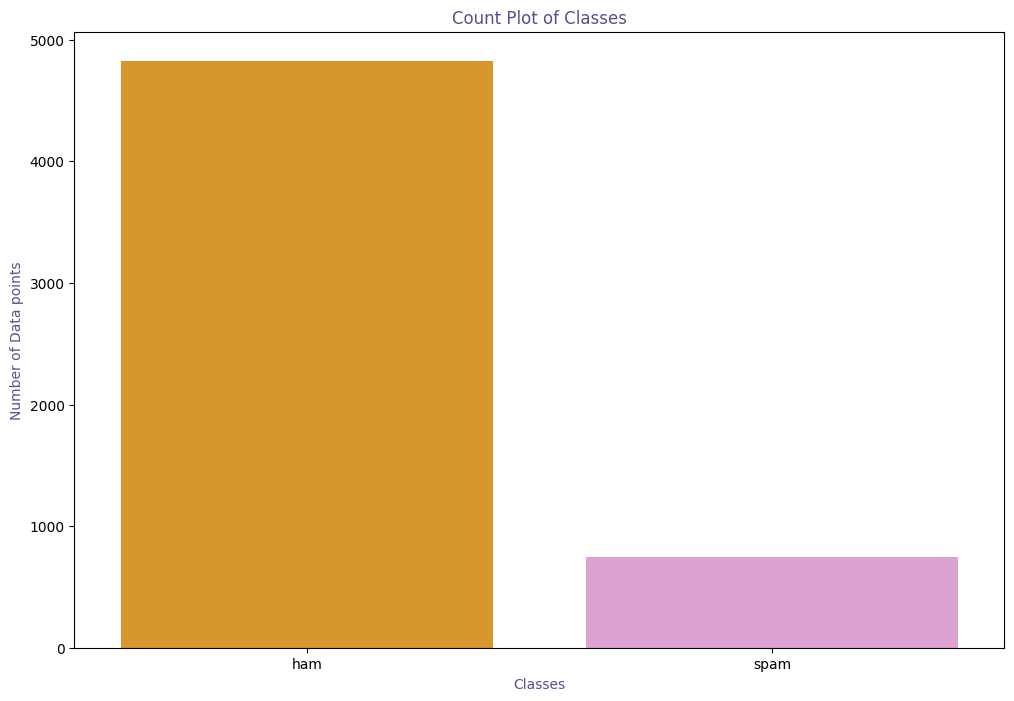

In [20]:
#Palette
cols= ["#F39C12", "#E598D8"] 
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["label"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

<a id="5"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Text Preprocessing</p>   


<a id="5.1"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">1. Conversion to Lowercase</p>   


In [22]:
data['message'] = data['message'].str.lower()

<a id="5.2"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">2. Removing Urls</p>   


In [33]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)


In [32]:
data['message'] = data['message'].apply(remove_url)

<a id="5.3"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">3. Removing HTML Tags</p>   


In [28]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)



In [34]:
data['message'] = data['message'].apply(remove_html_tags)

<a id="5.4"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">4. Removing Punctuations</p>   


In [31]:
punct = string.punctuation
def remove_punct(text):
    return text.translate(str.maketrans('', '', punct))

In [35]:
data['message'] = data['message'].apply(remove_punct)

<a id="5.5"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">5. Replacing Short-Convo/Chat-Words</p>   


In [36]:
# Removing Short Convo / Chat Words
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [37]:
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

In [38]:
data['message'] = data['message'].apply(chat_conversion)

<a id="5.6"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">6. Spelling Correction</p>   


In [40]:

def correct_spell(text):
    return str(TextBlob(text).correct())


In [41]:
msg['message'] = msg['message'].apply(correct_spell)

<a id="5.7"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">7. Removing Stopwords</p>   


In [42]:
stopword = set(stopwords.words('english'))
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopword:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [43]:
msg['message'] = msg['message'].apply(remove_stopwords)

<a id="5.8"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">8. Removing Emojis</p>   


In [44]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [45]:
data['message'] = data['message'].apply(remove_emoji)

<a id="5.9"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">9. Lemmatization</p>   


In [50]:
lemmatizer = WordNetLemmatizer()

In [51]:
corpus = []
# just apply stemming i have already done text preprocessing
for i in range(0, len(msg)):
    # Keep only alphabetic characters and split into words
    review = re.sub('[^a-zA-Z]', ' ', msg['message'][i])
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopword]
    review = ' '.join(review)
    corpus.append(review)

<a id="6"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Vectorization</p>   


<a id="6.1"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Bag of Words</p>   



In [109]:
cv = CountVectorizer(max_features=2500,ngram_range=(2,2))

In [110]:
X = cv.fit_transform(corpus).toarray()

In [111]:
cv.vocabulary_

{'free entry': 657,
 'entry wily': 555,
 'wily come': 2359,
 'st txt': 1911,
 'txt rate': 2200,
 'rate apply': 1666,
 'think go': 2048,
 'freemsg key': 676,
 'like fun': 1117,
 'is per': 985,
 'per request': 1551,
 'request selle': 1723,
 'selle selle': 1795,
 'selle you': 1796,
 'you minnaminunginte': 2476,
 'minnaminunginte nurungu': 1252,
 'nurungu bettah': 1444,
 'bettah set': 167,
 'set callertune': 1819,
 'callertune callers': 263,
 'callers dress': 262,
 'dress copy': 518,
 'copy friend': 386,
 'friend callertune': 679,
 'winner is': 2372,
 'is valued': 992,
 'valued network': 2240,
 'network customer': 1378,
 'customer selected': 428,
 'selected received': 1794,
 'reward to': 1730,
 'to claim': 2105,
 'claim call': 309,
 'call claim': 230,
 'claim code': 310,
 'valid hour': 2237,
 'had mobile': 838,
 'entitled update': 552,
 'update latest': 2215,
 'latest colour': 1078,
 'mobile camera': 1275,
 'free all': 648,
 'all the': 45,
 'the mobile': 2032,
 'mobile update': 1288,
 'upd

<a id="6.2"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">TF-IDF</p>   


In [83]:
tfidf = TfidfVectorizer(max_features=2500,ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(corpus).toarray()

In [85]:
tfidf.vocabulary_

{'to': 2134,
 'point': 1609,
 'crazy': 466,
 'available': 134,
 'boris': 220,
 'great': 874,
 'world': 2427,
 'la': 1094,
 'line': 1160,
 'got': 864,
 'wat': 2330,
 'war': 2320,
 'joking': 1070,
 'free': 748,
 'entry': 632,
 'wily': 2396,
 'come': 403,
 'win': 2397,
 'up': 2244,
 'final': 702,
 'must': 1378,
 'may': 1261,
 'next': 1416,
 'receive': 1696,
 'question': 1662,
 'st': 1960,
 'txt': 2220,
 'rate': 1677,
 'apply': 97,
 'free entry': 754,
 'entry wily': 634,
 'st txt': 1962,
 'txt rate': 2226,
 'rate apply': 1678,
 'dun': 589,
 'say': 1794,
 'early': 594,
 'already': 62,
 'ah': 36,
 'think': 2105,
 'go': 824,
 'life': 1146,
 'around': 110,
 'though': 2114,
 'freemsg': 761,
 'key': 1080,
 'darling': 487,
 'week': 2353,
 'word': 2423,
 'back': 152,
 'like': 1151,
 'fun': 784,
 'still': 1976,
 'ok': 1477,
 'send': 1827,
 'like fun': 1153,
 'even': 642,
 'brother': 245,
 'speak': 1947,
 'they': 2101,
 'treat': 2197,
 'is': 1043,
 'per': 1555,
 'request': 1727,
 'selle': 1825,
 'yo

<a id="7"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Data Preprocessing</p>   


### Using Bag of Words

In [99]:
# Independent Features
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [112]:
# Dependent Features or Output Features
y = pd.get_dummies(data['label']).astype(int)
y=y.iloc[:,0].values    
print(y)

[1 1 0 ... 1 1 1]


In [113]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Using TF-IDF

In [84]:
# Independent Features
print(X_tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [87]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.20, random_state=42)

<a id="8"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Model Building</p>   


### Using Bag of Words

In [116]:
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [115]:
spam_detect_model

MultinomialNB()

In [117]:
y_pred=spam_detect_model.predict(X_test)

### Using TF-IDF

In [88]:
spam_detect_model_tfidf = MultinomialNB().fit(X_train_tfidf, y_train_tfidf)

In [89]:
spam_detect_model_tfidf

MultinomialNB()

In [106]:
y_pred_tfidf=spam_detect_model_tfidf.predict(X_test_tfidf)

<a id="9"></a>
# <p style="background:linear-gradient(135deg, #A2C2E4, #6C5B7B, #F1C40F);font-family:newtimeroman;color:#F39C12;font-size:100%;text-align:center;border-radius:20px 60px;">Model Evaluation</p>   


### Using Bag of Words

In [118]:
accuracy_score(y_test,y_pred)

0.9704035874439462

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### Using TF-IDF

In [108]:
accuracy_score(y_test_tfidf,y_pred_tfidf)

0.9775784753363229

In [119]:
print(classification_report(y_test_tfidf,y_pred_tfidf))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       149
           1       0.97      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

